Based on this vid: https://www.youtube.com/watch?v=15zlr2vJqKc

Models initialization

In [1]:
import torch
import torchvision.models as models

In [2]:
modelDict = {
    'VGG': models.vgg19_bn(pretrained=True),
    'AlexNet': models.alexnet(pretrained=True),
    'ResNet': models.resnet152(pretrained=True),
    'GoogleNet': models.googlenet(pretrained=True),
    'SqueezeNet': models.squeezenet1_1(pretrained=True),
    'DenseNet': models.densenet201(pretrained=True),
    'Inception': models.inception_v3(pretrained=True),
    'MobileNet': models.mobilenet_v3_large(pretrained=True),
    'ResNeXt': models.resnext101_32x8d(pretrained=True),
    'Wide ResNet': models.wide_resnet101_2(pretrained=True),
}

Images

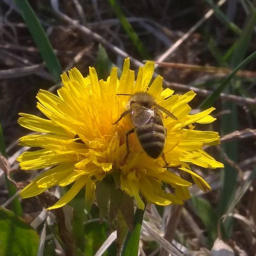

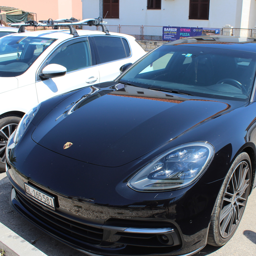

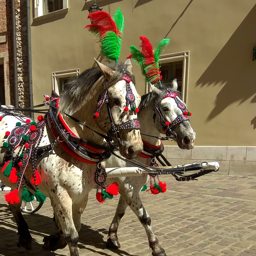

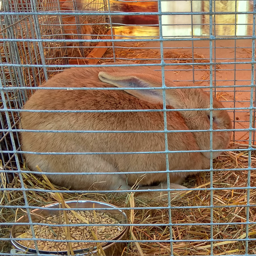

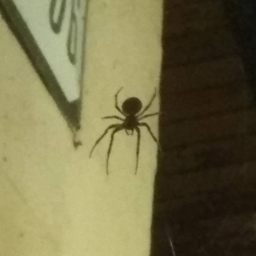

In [11]:
from PIL import Image
from skimage import io, transform
from IPython.display import display
import matplotlib.pyplot as plt
import os

directory = os.path.join('..', 'Images', 'Myimages')

images = {
    'Bee': Image.open(os.path.join(directory, 'bee.jpg')),
    'Car': Image.open(os.path.join(directory, 'car.jpg')),
    'Horse': Image.open(os.path.join(directory, 'horse.jpg')),
    'Rabbit': Image.open(os.path.join(directory, 'rabbit.jpg')),
    'Spider': Image.open(os.path.join(directory, 'spider.jpg'))
}

for img in images:
    display(images[img].resize((256,256)))

Image transformations

In [4]:
from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize(256),             # Resizing image to 256x256 
    transforms.CenterCrop(224),         # Crop the image to 224x224 pixels from center
    transforms.ToTensor(),              # Convert image to PyTorch Tensor data type
    transforms.Normalize(               # Normalizing image
        mean=[0.485, 0.456, 0.406],     # Mean and std same as used on training data
        std=[0.229, 0.224, 0.225]
    )
])

Class names

In [5]:
with open('imagenet_classes.txt') as f:
    classes = [line.split(", ")[1].strip() for line in f.readlines()]

Testing NNs and creating .csv file with result

In [6]:
import csv

result = open('result.csv', 'w')
filewriter = csv.writer(result, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
filewriter.writerow(['Image', 'VGG', 'AlexNet', 'ResNet', 'GoogleNet', 'SqueezeNet', 'DenseNet', 'Inception', 'MobileNet', 'ResNeXt', 'Wide ResNet'])

96

In [7]:
for img in images:
    row = []
    row.append(img)
    img_t = transform(images[img])
    batch_t = torch.unsqueeze(img_t, 0)
    print(img, ":")
    for model in modelDict:
        print("\t", model, ":")
        modelDict[model].eval()
        out = modelDict[model](batch_t)
        _, indices = torch.sort(out, descending=True)
        percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
        found = 0
        for idx in indices[0][:5]:
            print("\t\t", classes[idx], "   ", percentage[idx].item())
            if classes[idx].lower().find(img.lower()) >= 0:
                found = percentage[idx].item()
                break
        row.append(found)
    filewriter.writerow(row)

result.close()
"DONE"

Bee :
	 VGG :
		 bee     96.79273223876953
	 AlexNet :
		 bee     53.89301300048828
	 ResNet :
		 bee     98.25080108642578
	 GoogleNet :
		 bee     66.26425170898438
	 SqueezeNet :
		 bee     46.83485794067383
	 DenseNet :
		 bee     95.54661560058594
	 Inception :
		 bee     99.8888168334961
	 MobileNet :
		 bee     91.72171783447266
	 ResNeXt :
		 bee     99.79252624511719
	 Wide ResNet :
		 bee     97.56465911865234
Car :
	 VGG :
		 beach_wagon     38.37336730957031
		 grille     24.22553825378418
		 sports_car     15.982553482055664
	 AlexNet :
		 sports_car     67.1085433959961
	 ResNet :
		 grille     27.423295974731445
		 sports_car     23.955183029174805
	 GoogleNet :
		 sports_car     46.34892654418945
	 SqueezeNet :
		 sports_car     72.58556365966797
	 DenseNet :
		 grille     46.45689010620117
		 beach_wagon     16.622997283935547
		 car_wheel     12.29330825805664
	 Inception :
		 sports_car     61.97242736816406
	 MobileNet :
		 sports_car     81.0721664428711
	 ResNeXt 

'DONE'

Visualize result

In [8]:
import pandas as pd

df = pd.read_csv('result.csv')

<AxesSubplot:title={'center':'Top 5 percentage'}, xlabel='Image'>

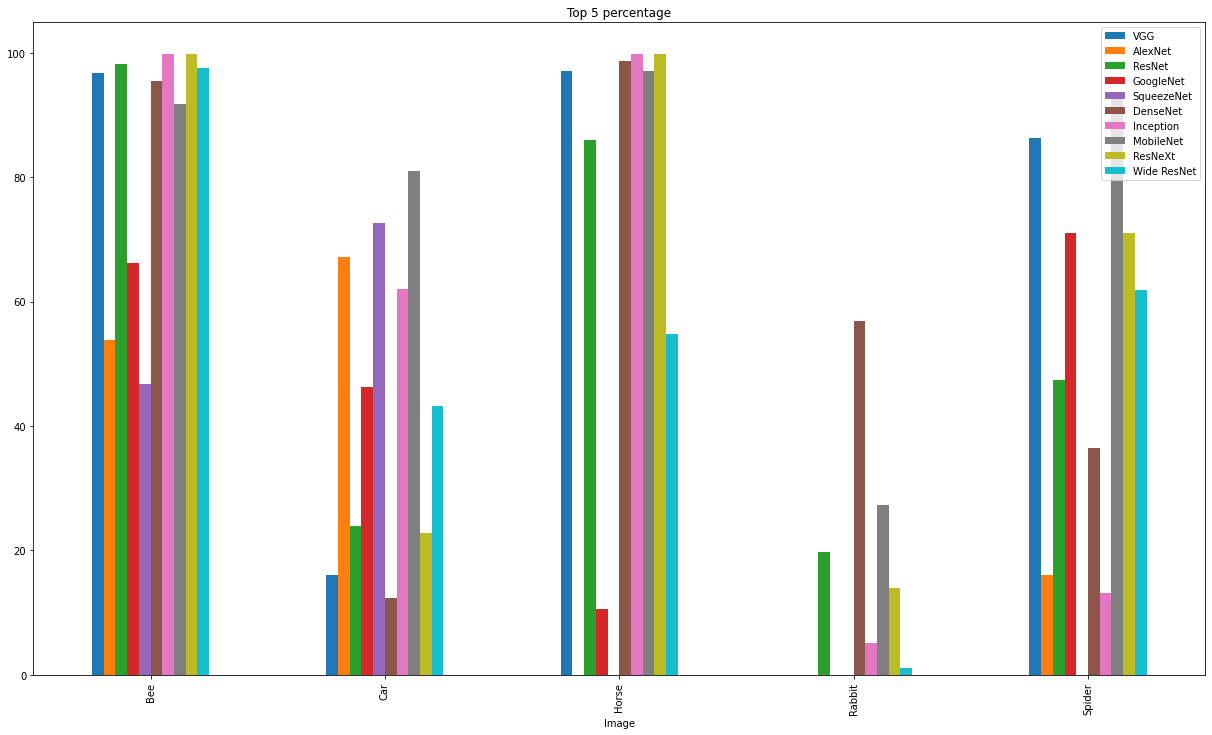

In [9]:
df.plot(x="Image", y=['VGG', 'AlexNet', 'ResNet', 'GoogleNet', 'SqueezeNet', 'DenseNet', 'Inception', 'MobileNet', 'ResNeXt', 'Wide ResNet'], kind="bar", figsize=(21, 12), title=("Top 5 percentage"))